<a href="https://colab.research.google.com/github/vishal-pandey/iot-transfer/blob/master/shanghai-ssim-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
URL_shanghai = "https://github.com/vishal-pandey/iot-transfer/raw/master/pm25_shanghai.csv"

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
df_shanghai = pd.read_csv(URL_shanghai)

In [0]:
pm25_shanghai = df_shanghai.iloc[:, 0].values

In [0]:
pm25_shanghai = pm25_shanghai.reshape(-1, 1)

In [0]:
scaler_shanghai = StandardScaler()
scaler_shanghai.fit(pm25_shanghai)
pm25_shanghai = scaler_shanghai.transform(pm25_shanghai)

In [0]:
N = 20
O = 5
P = 20

In [0]:
X_shanghai = []
y_shanghai = []

for i in range(len(pm25_shanghai) - (N + O + P)):
  temp = []
  temp1 = pm25_shanghai[i : i+N]
  temp2 = [0 for _ in range(O)]
  temp3 = pm25_shanghai[i+N+O : i+N+O+P]
  X_shanghai.append(np.append(np.append(temp1, temp2), temp3))
  y_shanghai.append(pm25_shanghai[i+N : i+N+O].reshape(O))

In [0]:
X_shanghai = np.array(X_shanghai)
y_shanghai = np.array(y_shanghai)

In [30]:
print(X_shanghai.shape)
print(y_shanghai.shape)

(555, 45)
(555, 5)


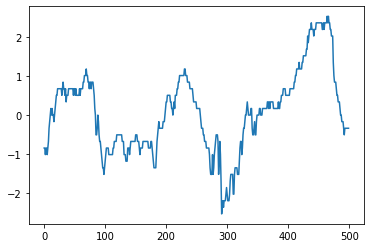

In [31]:
plt.plot(pm25_shanghai[:500])
plt.show()

In [0]:
X_shanghai_train, X_shanghai_test, y_shanghai_train, y_shanghai_test = train_test_split(X_shanghai, y_shanghai)

In [0]:
X_shanghai_train = X_shanghai_train.reshape(X_shanghai_train.shape[0], -1, 1)
X_shanghai_test = X_shanghai_test.reshape(X_shanghai_test.shape[0], -1, 1)

In [34]:
!pip install keras-self-attention
from keras_self_attention import SeqSelfAttention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.42.0-cp36-none-any.whl size=17296 sha256=4135703f7af42f3575da75df329b7376e7ec5cfccd9a32800023dcdf5c8c7bc3
  Stored in directory: /root/.cache/pip/wheels/7b/05/a0/99c0cf60d383f0494e10eca2b238ea98faca9a1fe03cac2894
Successfully built keras-self-attention


In [0]:
from keras.layers import LSTM, Bidirectional, Dropout
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D

In [36]:
X_shanghai_train.shape

(416, 45, 1)

In [38]:
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_shanghai_train.shape[1],X_shanghai_train.shape[2])))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(LSTM(64))
model.add(Dense(O))
model.compile(optimizer='adam', loss='mse')

In [39]:
model.fit(X_shanghai_train, y_shanghai_train, epochs=20, validation_data=(X_shanghai_test, y_shanghai_test))

Train on 416 samples, validate on 139 samples
Epoch 1/20
416/416 [==============================] - 5s 12ms/step - loss: 0.4999 - val_loss: 0.2353
Epoch 2/20
416/416 [==============================] - 3s 6ms/step - loss: 0.1786 - val_loss: 0.1637
Epoch 3/20
416/416 [==============================] - 2s 6ms/step - loss: 0.1450 - val_loss: 0.1406
Epoch 4/20
416/416 [==============================] - 2s 6ms/step - loss: 0.1331 - val_loss: 0.1364
Epoch 5/20
416/416 [==============================] - 2s 6ms/step - loss: 0.1315 - val_loss: 0.1329
Epoch 6/20
416/416 [==============================] - 2s 6ms/step - loss: 0.1179 - val_loss: 0.1200
Epoch 7/20
416/416 [==============================] - 2s 6ms/step - loss: 0.1154 - val_loss: 0.1274
Epoch 8/20
416/416 [==============================] - 2s 6ms/step - loss: 0.1187 - val_loss: 0.1241
Epoch 9/20
416/416 [==============================] - 2s 6ms/step - loss: 0.1097 - val_loss: 0.1120
Epoch 10/20
416/416 [==============================] 

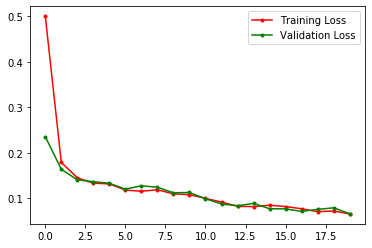

In [40]:
plt.plot(model.history.history['loss'], 'r.-', label="Training Loss")
plt.plot(model.history.history['val_loss'], 'g.-', label="Validation Loss")
plt.legend()
plt.show()

In [0]:
y_hat = model.predict(X_shanghai_test)

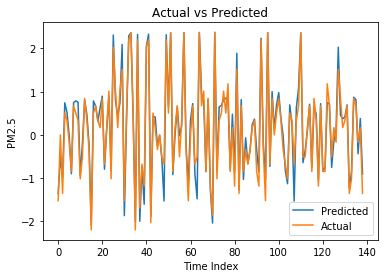

In [45]:
plt.title("Actual vs Predicted")
plt.plot(y_hat[:, 0], label="Predicted")
plt.plot(y_shanghai_test[:, 0], label="Actual")
plt.xlabel("Time Index")
plt.ylabel("PM2.5")
plt.legend()
plt.show()

In [0]:
model.save('pm25_shanghai_ssim_model.h5')